# Apply Scenario Discovery

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
experiments = pd.read_csv('./experiments/experiments_open_exploration.csv')
outcomes = pd.read_csv('./experiments/outcomes_open_exploration')

In [53]:
cleaned_experiments = experiments.drop(experiments.columns[0], axis = 1)
cleaned_outcomes = outcomes.drop(outcomes.columns[0], axis = 1)

In [54]:
cleaned_experiments.head()

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,17,345.712502,10.0,0.728638,37.722265,1.5,0.959779,227.275706,1.5,0.428011,...,6,1,4,9,3,4,1,20,0,dikesnet
1,86,72.464352,1.5,0.054115,154.943361,10.0,0.344173,132.677822,1.0,0.044889,...,6,1,4,9,3,4,1,21,0,dikesnet
2,27,348.743540,10.0,0.061011,160.344607,1.5,0.691151,128.020377,1.5,0.045851,...,6,1,4,9,3,4,1,22,0,dikesnet
3,55,324.660415,10.0,0.990353,285.584226,1.5,0.105428,175.956893,10.0,0.935988,...,6,1,4,9,3,4,1,23,0,dikesnet
4,29,181.220933,1.0,0.975884,48.845047,1.0,0.673831,144.279642,10.0,0.437092,...,6,1,4,9,3,4,1,24,0,dikesnet


In [55]:
cleaned_outcomes.head()

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,1.021929e+08,0.0,2.354086e+08,0.0,9.996885e+07,0.000000,3.258505e+07,0.0,1.441351e+08,0.000000,787400000.0,0.000000
1,1.021929e+08,0.0,2.354086e+08,0.0,1.008287e+08,0.000827,3.258505e+07,0.0,1.441351e+08,0.000000,787400000.0,27.598104
2,1.021929e+08,0.0,2.354086e+08,0.0,1.074956e+08,0.003656,3.258505e+07,0.0,1.509283e+08,0.001701,787400000.0,275.232526
3,1.021929e+08,0.0,2.354086e+08,0.0,9.996885e+07,0.000000,3.258505e+07,0.0,1.441351e+08,0.000000,787400000.0,0.000000
4,1.021929e+08,0.0,2.354086e+08,0.0,9.996885e+07,0.000000,3.258505e+07,0.0,1.441351e+08,0.000000,787400000.0,0.000000


In [56]:
cleaned_experiments = cleaned_experiments.drop(labels=[l.name for l in dike_model.levers], axis=1)

### Create figure for total costs of A5

In [57]:
from ema_workbench.analysis import prim

data = cleaned_outcomes['A.5 Total Costs']
print(data)

y = data < np.percentile(data, 10)

prim_alg = prim.Prim(cleaned_experiments,y, threshold=0.23)
box1 = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 20000 points remaining, containing 2000 cases of interest


0        1.441351e+08
1        1.441351e+08
2        1.509283e+08
3        1.441351e+08
4        1.441351e+08
             ...     
19995    2.161793e+08
19996    2.161793e+08
19997    2.161793e+08
19998    2.161793e+08
19999    2.161793e+08
Name: A.5 Total Costs, Length: 20000, dtype: float64


[MainProcess/INFO] mean: 0.23076923076923078, mass: 0.22945, coverage: 0.5295, density: 0.23076923076923078 restricted_dimensions: 4


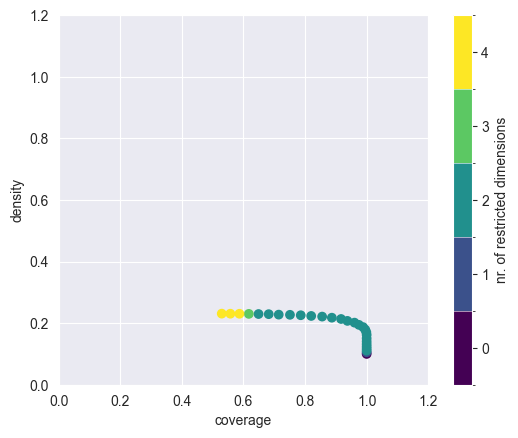

In [58]:
box1.show_tradeoff()
plt.show()

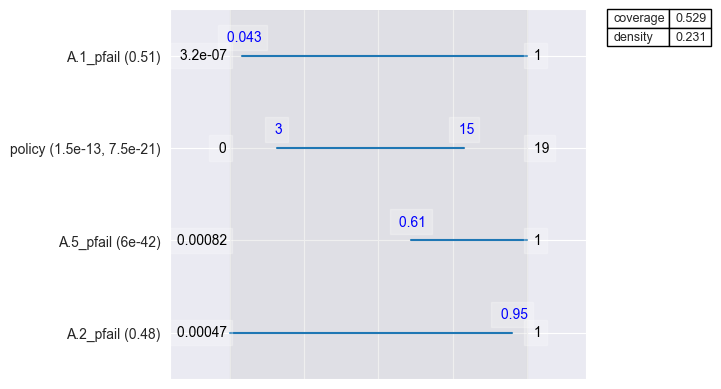

In [59]:
box1.inspect(style='graph')
plt.show()

### Create figure for evacuation costs

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 20000 points remaining, containing 7366 cases of interest
[MainProcess/INFO] mean: 0.7008547008547008, mass: 0.0585, coverage: 0.11132229161010046, density: 0.7008547008547008 restricted_dimensions: 11


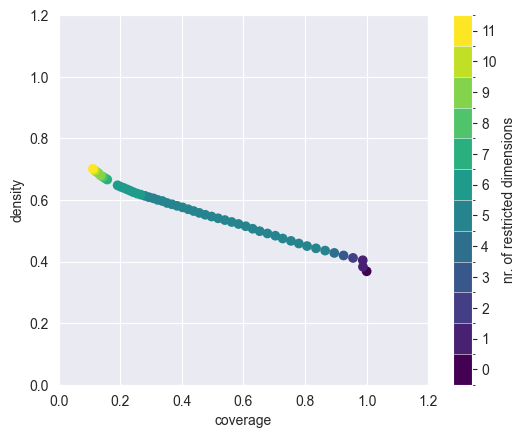

In [60]:
from ema_workbench.analysis import prim

x = cleaned_experiments
y = cleaned_outcomes["Expected Evacuation Costs"] < 0.8
prim_alg = prim.Prim(x, y, threshold=0.7)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

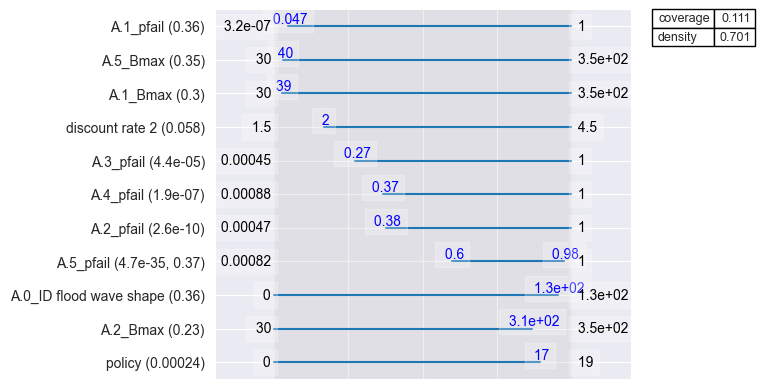

In [61]:
box1.inspect(style='graph')
plt.show()

### Create figure for expected number of deaths A5

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 20000 points remaining, containing 4863 cases of interest
[MainProcess/INFO] mean: 0.7638095238095238, mass: 0.0525, coverage: 0.16491877441908287, density: 0.7638095238095238 restricted_dimensions: 5


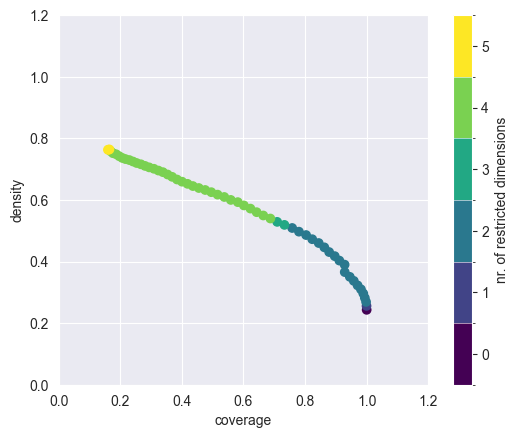

In [62]:
from ema_workbench.analysis import prim

x = cleaned_experiments
y = cleaned_outcomes["A.5_Expected Number of Deaths"] > 0
prim_alg = prim.Prim(x, y, threshold=0.76)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

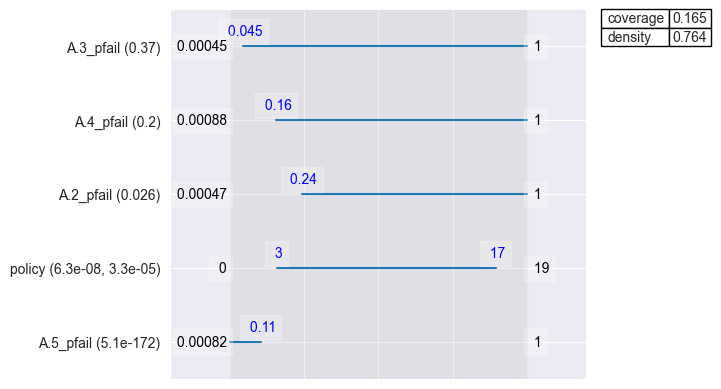

In [63]:
box1.inspect(style='graph')
plt.show()